## Problem Statement :

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.


They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.
The company wants to understand the factors affecting the pricing of cars in the American market., since those may be very different from the Chinese market. The company wants to know:

* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

## Business Goal :

* Model the price of cars with the available independent variables.
* The model would enable the management to understand how exactly the prices vary with the independent variables.
* The management can use the model to accordingly manipulate the design of the cars, the business strategy etc. to meet
  certain price levels.
* The model will be a good way for the management to understand the pricing dynamics of a new market.

## Reading and Understanding the Data

In [1]:
import warnings

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading File

carinfo = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
carinfo.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [5]:
# Checking the shape
carinfo.shape

(205, 26)

In [6]:
carinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# Describe

carinfo.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

# Cleaning Dataset

In [8]:
# Check if there are any duplicate values in the dataset

carinfo[carinfo.duplicated(keep=False)]

Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]

In [9]:
# Split the car Name and check for unique car names to understand if the car names are repeated based on erroneous spellings

carinfo['CarName'] = carinfo['CarName'].str.split(' ', expand = True)[0]
carinfo.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
# Since the car names are duplicated with erroneous spellings, correct the cpellings and replace the values.

carinfo.CarName = carinfo.CarName.replace({'alfa-romero':'alfa-romeo',
                                                   'maxda': 'mazda',
                                                   'Nissan': 'nissan',
                                                   'porcshce':'porsche',
                                                   'toyouta': 'toyota',
                                                   'vokswagen': 'volkswagen',
                                                   'vw': 'volkswagen'})
carinfo.CarName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
# change CarName column to carname to maintain uniformity in the column names

carinfo = carinfo.rename(columns = {'CarName':'carname'})

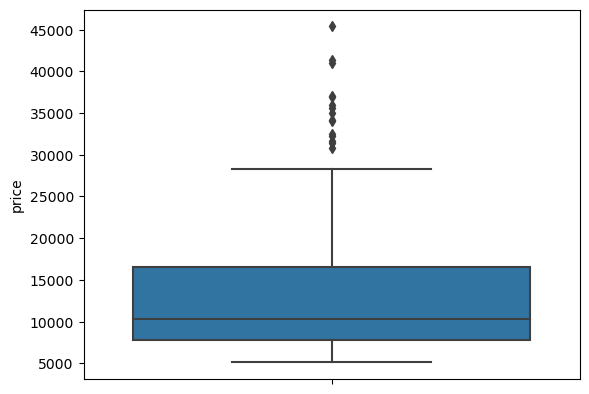

In [12]:
# Check the outliers in price column

sns.boxplot(y = 'price',data = carinfo)
plt.show()

In [13]:
# Removing values beyond 99% in price column

nn_quantile = carinfo['price'].quantile(0.99)
carinfo = carinfo[carinfo['price']< nn_quantile]
carinfo['price'].describe()

count      202.000000
mean     12841.834985
std       7192.112132
min       5118.000000
25%       7778.250000
50%      10221.500000
75%      16482.500000
max      37028.000000
Name: price, dtype: float64

In [14]:
carinfo.shape

(202, 26)

# Data Visualisation

<Figure size 1000x600 with 0 Axes>

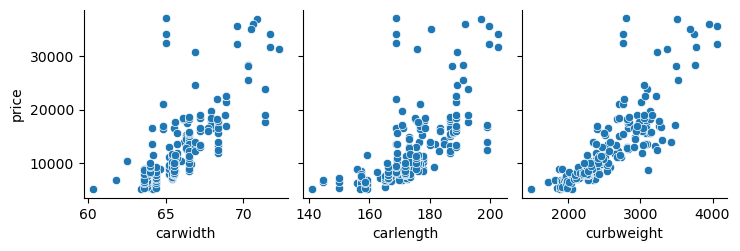

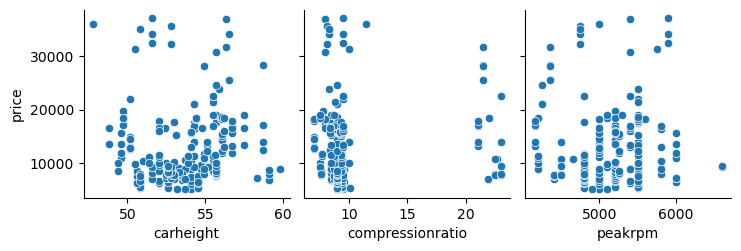

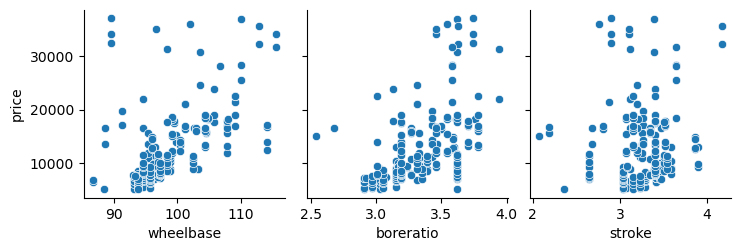

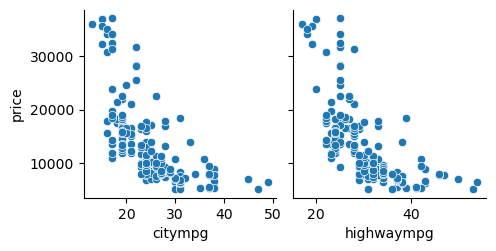

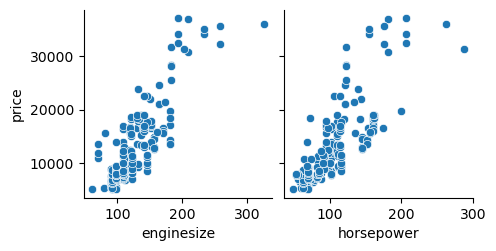

In [15]:
# Making pairplot for all numeric values that we need

plt.figure(figsize = (10,6))
sns.pairplot(x_vars =['carwidth','carlength','curbweight'], y_vars = 'price', data = carinfo)
sns.pairplot(x_vars =['carheight', 'compressionratio','peakrpm'], y_vars = 'price', data = carinfo)
sns.pairplot(x_vars =['wheelbase', 'boreratio','stroke'], y_vars = 'price', data = carinfo)
sns.pairplot(x_vars =['citympg','highwaympg'], y_vars = 'price', data = carinfo)
sns.pairplot(x_vars = ['enginesize','horsepower'], y_vars = 'price', data = carinfo)
plt.show()

# Visualisation Categorical data

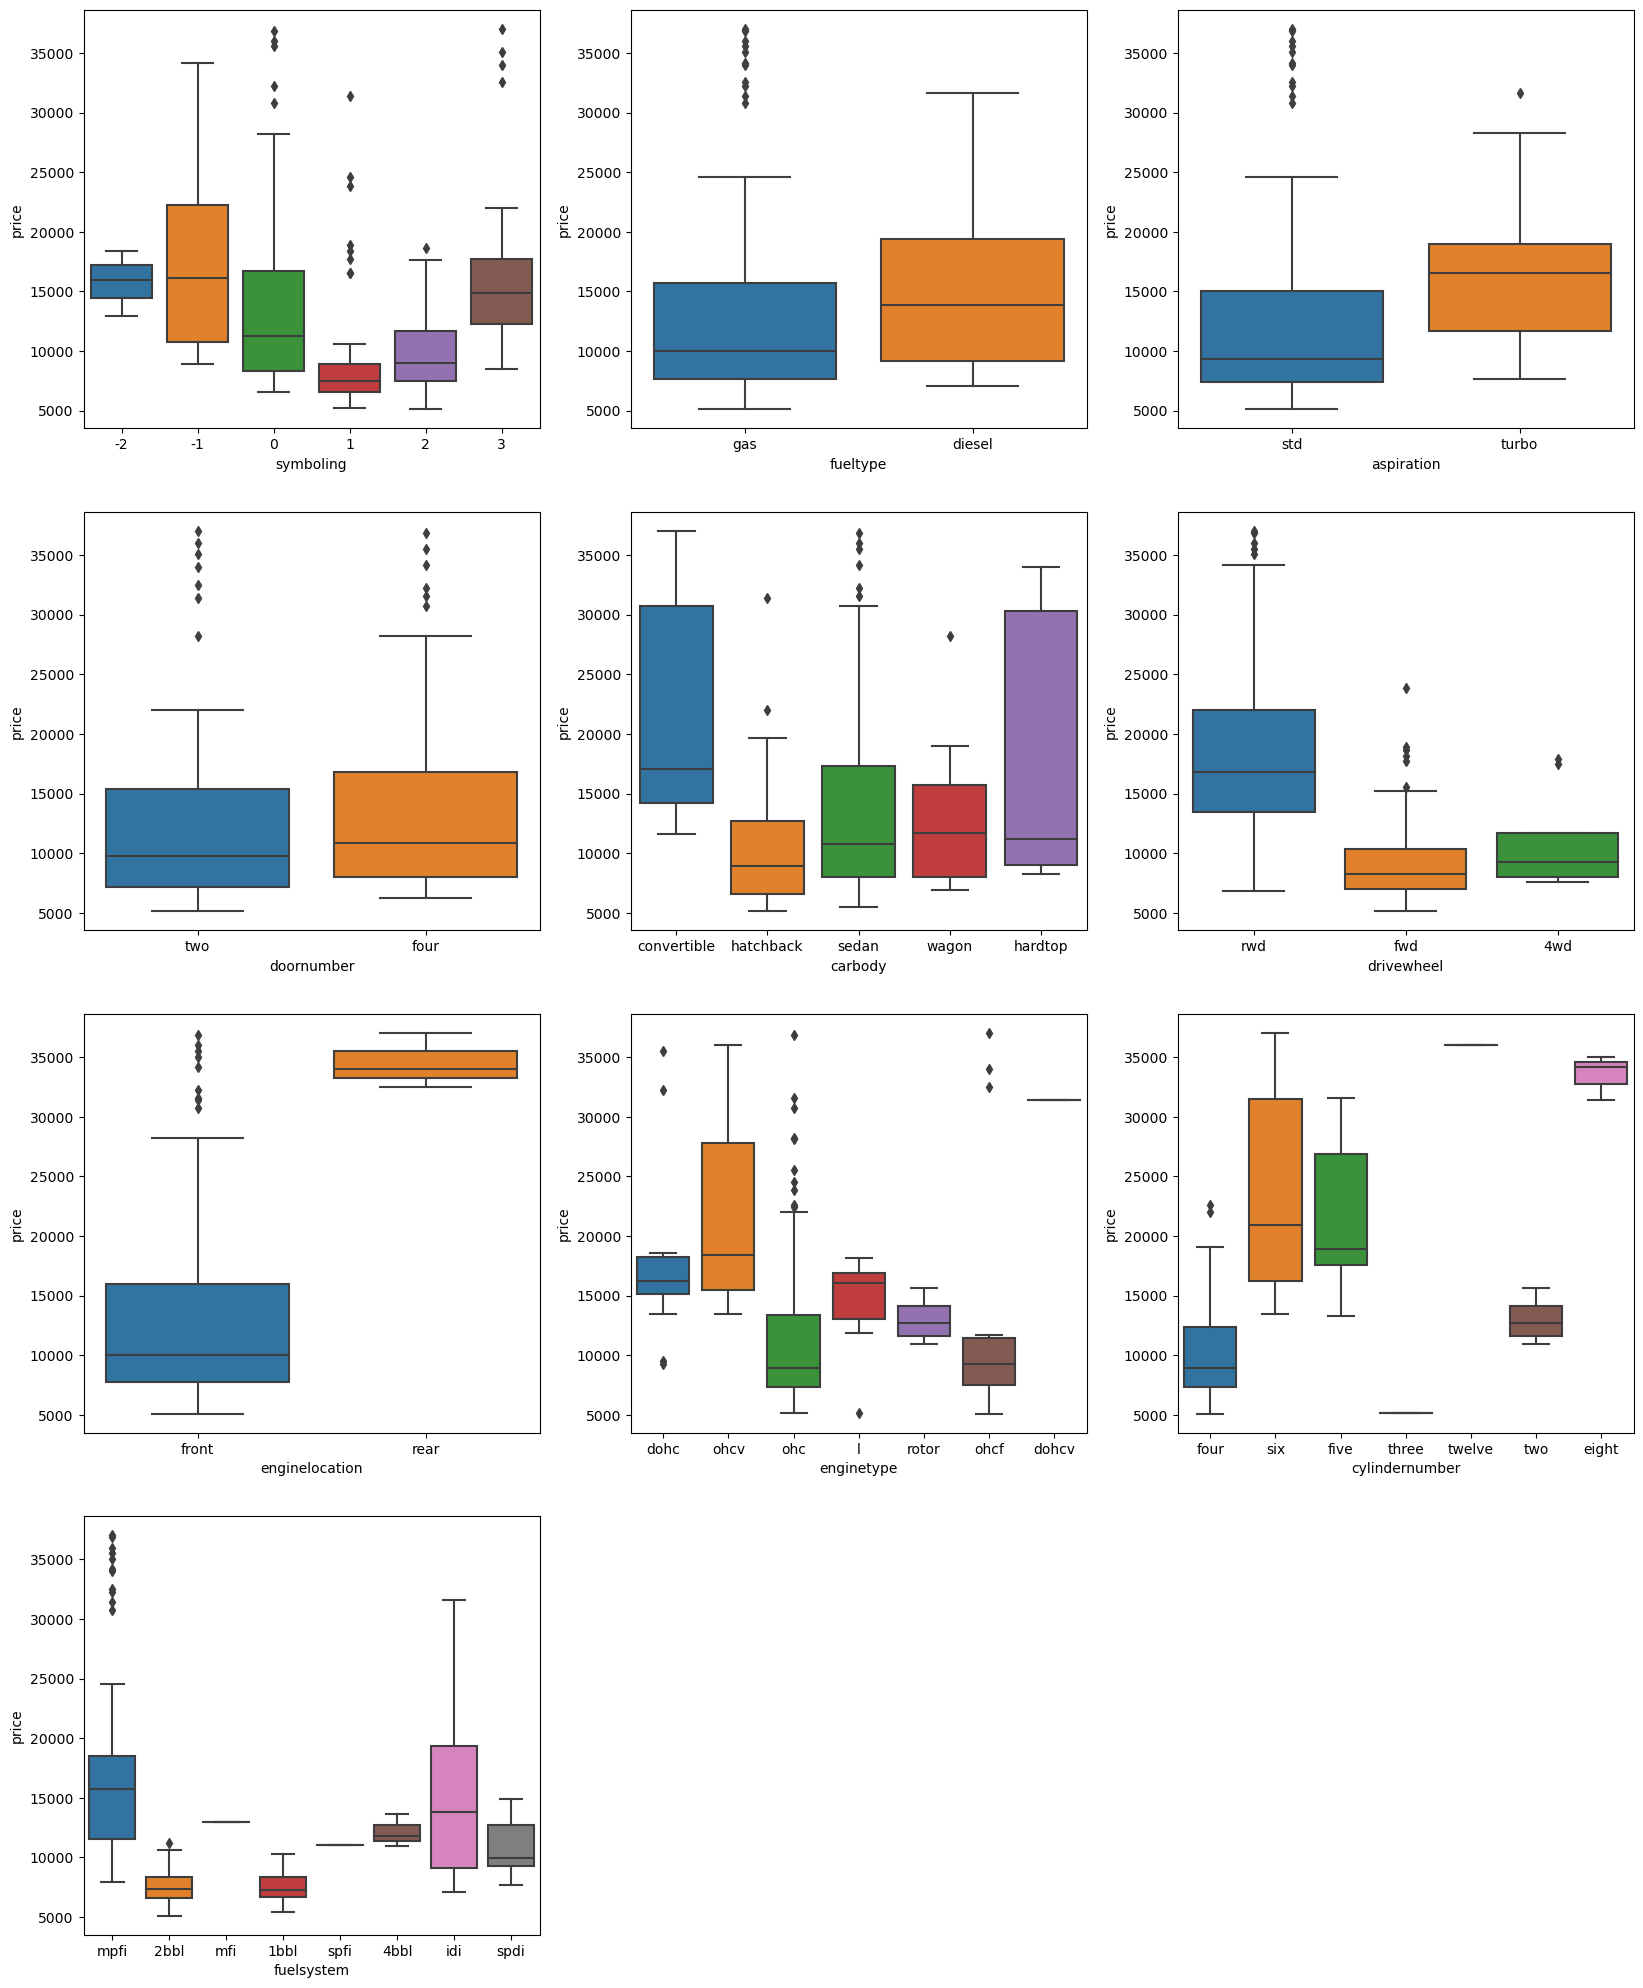

In [17]:
plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = carinfo)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = carinfo)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = carinfo)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = carinfo)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = carinfo)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = carinfo)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = carinfo)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = carinfo)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carinfo)
plt.subplot(4,3,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carinfo)
plt.show()

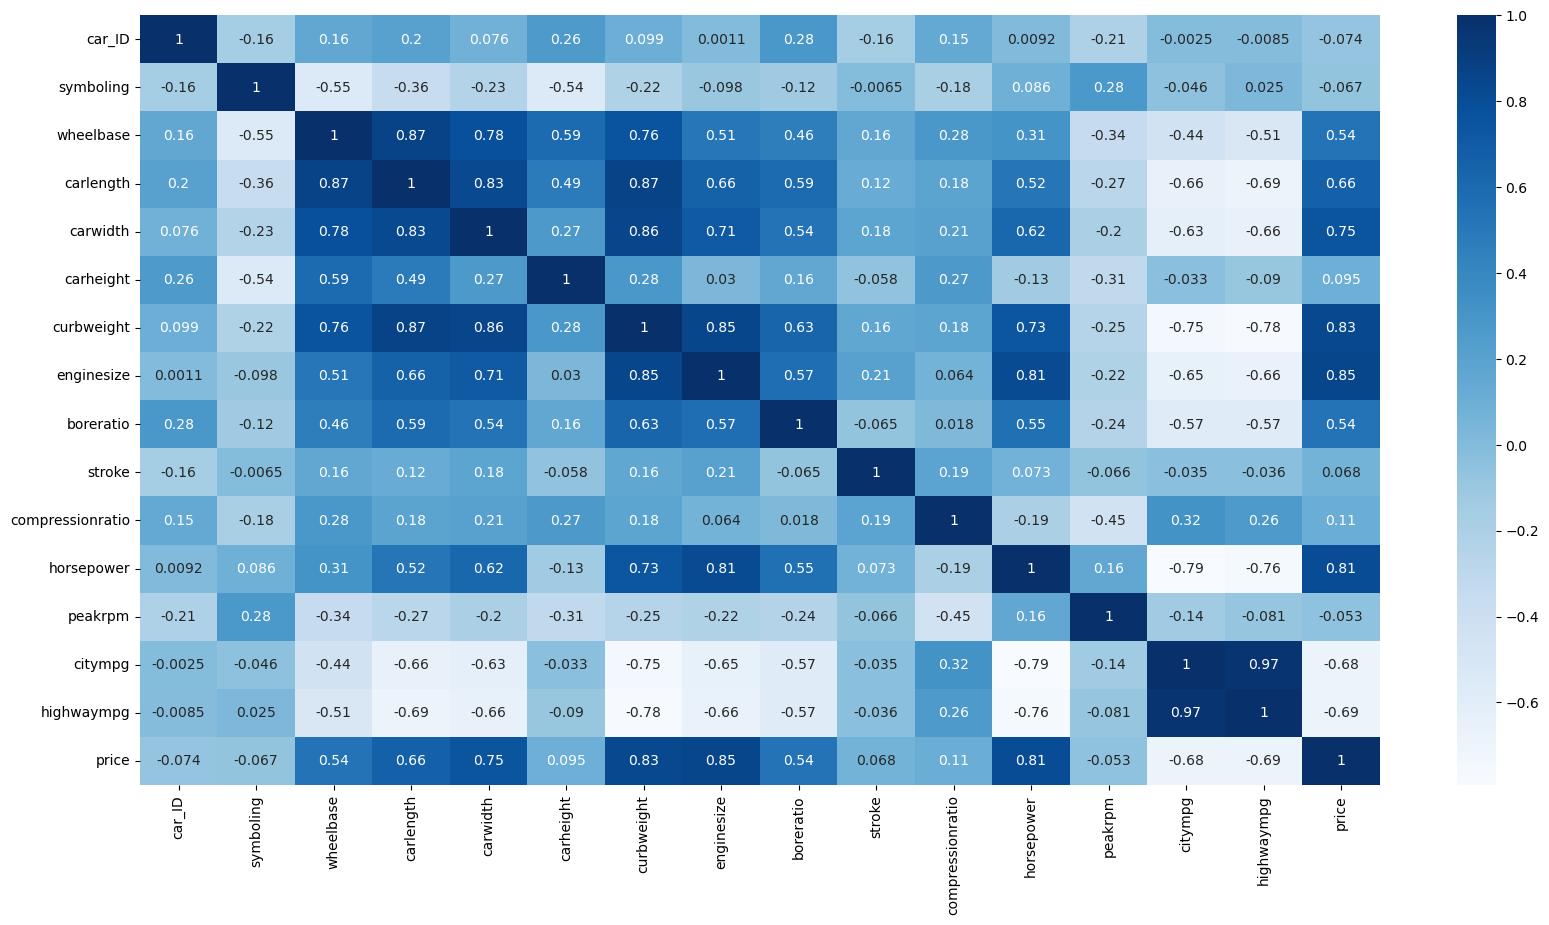

In [19]:
# Check the correlation of numerical columns

plt.figure(figsize =(20,10))
sns.heatmap(carinfo.corr(), annot=True, cmap = 'Blues')
plt.show()

# Data Preparation

In [22]:
#Removing the highly correlated variables

carinfo.drop(['wheelbase','carlength','carwidth','enginesize','highwaympg'], axis = 1, inplace = True )

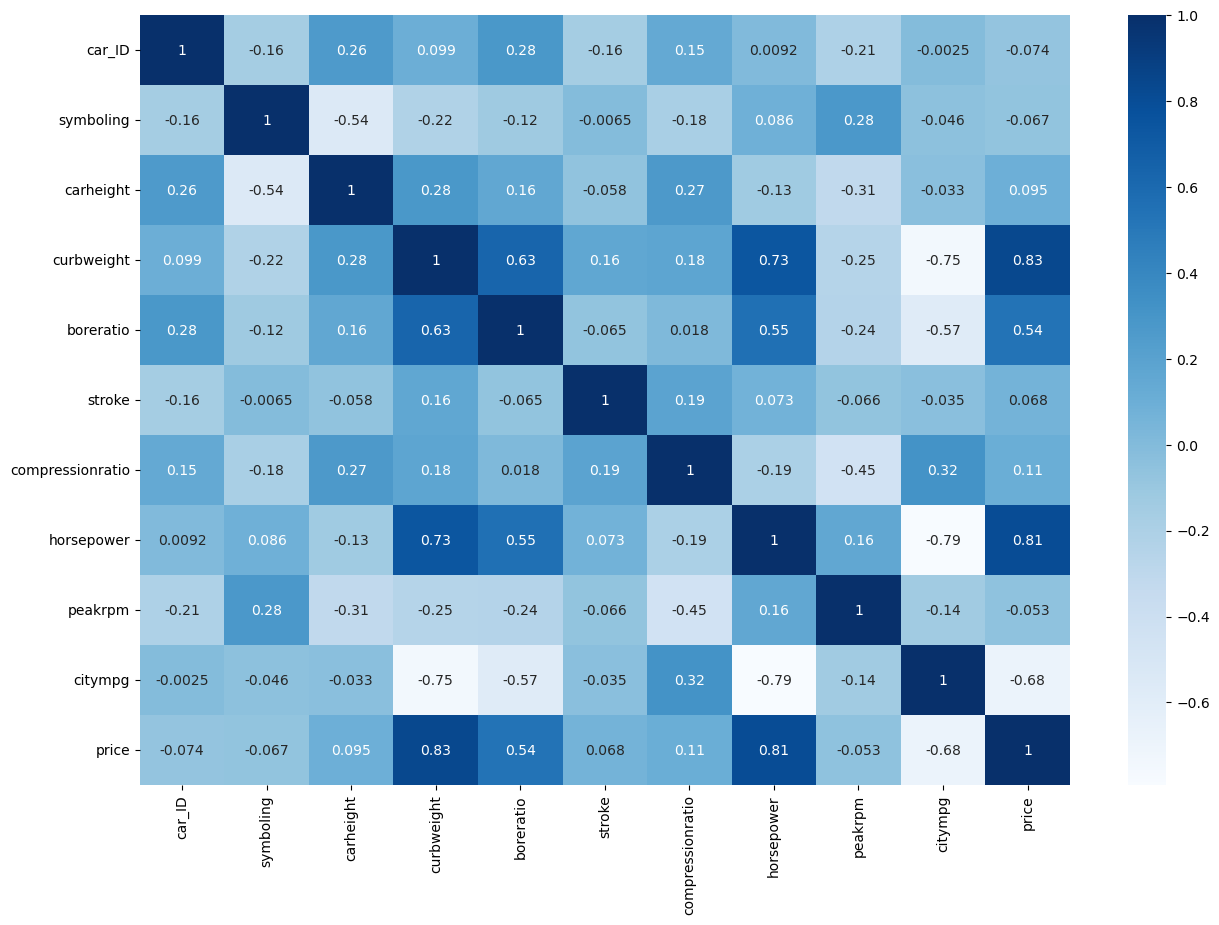

In [26]:
# check correlation after dropping columns

plt.figure(figsize = (15, 10))
sns.heatmap(carinfo.corr(), annot = True, cmap="Blues")
plt.show()

In [29]:
#converting those fields to binary which having two values 

carinfo['d_fueltype'] = carinfo['fueltype'].map({'diesel':0, 'gas':1})
carinfo['d_aspiration'] = carinfo['aspiration'].map({'turbo':0, 'std':1})
carinfo['d_doornumber'] = carinfo['doornumber'].map({'four':0, 'two':1})
carinfo['d_enginelocation'] = carinfo['enginelocation'].map({'rear':0, 'front':1})
carinfo.head()

car_ID  symboling     carname fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romeo      gas        std        two  convertible   
1       2          3  alfa-romeo      gas        std        two  convertible   
2       3          1  alfa-romeo      gas        std        two    hatchback   
3       4          2        audi      gas        std       four        sedan   
4       5          2        audi      gas        std       four        sedan   

  drivewheel enginelocation  carheight  ...  stroke compressionratio  \
0        rwd          front       48.8  ...    2.68              9.0   
1        rwd          front       48.8  ...    2.68              9.0   
2        rwd          front       52.4  ...    3.47              9.0   
3        fwd          front       54.3  ...    3.40             10.0   
4        4wd          front       54.3  ...    3.40              8.0   

  horsepower peakrpm  citympg    price  d_fueltype  d_aspiration  \
0        111    5000       21  13495.0           1             1   
1        111    5000       21  16500.0           1             1   
2        154    5000       19  16500.0           1             1   
3        102    5500       24  13950.0           1             1   
4        115    5500       18  17450.0           1             1   

   d_doornumber  d_enginelocation  
0             1                 1  
1             1                 1  
2             1                 1  
3             0                 1  
4             0                 1  

[5 rows x 25 columns]

In [30]:
# Removing one column from the dummy variable as there can be only 3 types of wheel drives.
# In case if the values in the data for the 2 fields that are retained is both 0, it would mean that the wheel drive is 
# neither of the both

d_drivewheel = pd.get_dummies(carinfo['drivewheel'], drop_first = True)
carinfo = pd.concat([carinfo, d_drivewheel],axis = 1)
carinfo.head()

car_ID  symboling     carname fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romeo      gas        std        two  convertible   
1       2          3  alfa-romeo      gas        std        two  convertible   
2       3          1  alfa-romeo      gas        std        two    hatchback   
3       4          2        audi      gas        std       four        sedan   
4       5          2        audi      gas        std       four        sedan   

  drivewheel enginelocation  carheight  ...  horsepower peakrpm citympg  \
0        rwd          front       48.8  ...         111    5000      21   
1        rwd          front       48.8  ...         111    5000      21   
2        rwd          front       52.4  ...         154    5000      19   
3        fwd          front       54.3  ...         102    5500      24   
4        4wd          front       54.3  ...         115    5500      18   

     price  d_fueltype  d_aspiration  d_doornumber  d_enginelocation  fwd  rwd  
0  13495.0           1             1             1                 1    0    1  
1  16500.0           1             1             1                 1    0    1  
2  16500.0           1             1             1                 1    0    1  
3  13950.0           1             1             0                 1    1    0  
4  17450.0           1             1             0                 1    0    0  

[5 rows x 27 columns]

In [31]:

# Creating dummies for carbody
# We will not remove any columns for dummies as this would affect our decision making while creating the model.

d_carbody = pd.get_dummies(carinfo['carbody'])
carinfo = pd.concat([carinfo, d_carbody],axis = 1)
carinfo.head()

car_ID  symboling     carname fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romeo      gas        std        two  convertible   
1       2          3  alfa-romeo      gas        std        two  convertible   
2       3          1  alfa-romeo      gas        std        two    hatchback   
3       4          2        audi      gas        std       four        sedan   
4       5          2        audi      gas        std       four        sedan   

  drivewheel enginelocation  carheight  ...  d_aspiration d_doornumber  \
0        rwd          front       48.8  ...             1            1   
1        rwd          front       48.8  ...             1            1   
2        rwd          front       52.4  ...             1            1   
3        fwd          front       54.3  ...             1            0   
4        4wd          front       54.3  ...             1            0   

  d_enginelocation fwd  rwd  convertible  hardtop  hatchback  sedan  wagon  
0                1   0    1            1        0          0      0      0  
1                1   0    1            1        0          0      0      0  
2                1   0    1            0        0          1      0      0  
3                1   1    0            0        0          0      1      0  
4                1   0    0            0        0          0      1      0  

[5 rows x 32 columns]

In [32]:
# Creating dummies for symboling

d_symboling = pd.get_dummies(carinfo['symboling'])
carinfo = pd.concat([carinfo, d_symboling],axis = 1)
carinfo = carinfo.rename(columns={-2: '-2_symboling', 
                                  -1: '-1_symboling',
                                   0: '0_symboling',
                                   1: '1_symboling',
                                   2: '2_symboling',
                                   3: '3_symboling'
                                })
carinfo.head()


car_ID  symboling     carname fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romeo      gas        std        two  convertible   
1       2          3  alfa-romeo      gas        std        two  convertible   
2       3          1  alfa-romeo      gas        std        two    hatchback   
3       4          2        audi      gas        std       four        sedan   
4       5          2        audi      gas        std       four        sedan   

  drivewheel enginelocation  carheight  ...  hardtop hatchback sedan wagon  \
0        rwd          front       48.8  ...        0         0     0     0   
1        rwd          front       48.8  ...        0         0     0     0   
2        rwd          front       52.4  ...        0         1     0     0   
3        fwd          front       54.3  ...        0         0     1     0   
4        4wd          front       54.3  ...        0         0     1     0   

   -2_symboling  -1_symboling  0_symboling  1_symboling  2_symboling  \
0             0             0            0            0            0   
1             0             0            0            0            0   
2             0             0            0            1            0   
3             0             0            0            0            1   
4             0             0            0            0            1   

   3_symboling  
0            1  
1            1  
2            0  
3            0  
4            0  

[5 rows x 38 columns]

In [34]:
# Creating dummies for enginetype

d_enginetype = pd.get_dummies(carinfo['enginetype'])
carinfo = pd.concat([carinfo, d_enginetype], axis = 1)
carinfo = carinfo.rename(columns={'dohc' : 'dohc_enginetype', 
                                  'dohcv': 'dohcv_enginetype',
                                  'l'    : 'l_enginetype',
                                  'ohc'  : 'ohc_enginetype',
                                  'ohcf' : 'ohcf_enginetype',
                                  'ohcv' : 'ohcv_enginetype',
                                  'rotor': 'rotor_enginetype',
                                })
carinfo.head()

car_ID  symboling     carname fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romeo      gas        std        two  convertible   
1       2          3  alfa-romeo      gas        std        two  convertible   
2       3          1  alfa-romeo      gas        std        two    hatchback   
3       4          2        audi      gas        std       four        sedan   
4       5          2        audi      gas        std       four        sedan   

  drivewheel enginelocation  carheight  ...  1_symboling 2_symboling  \
0        rwd          front       48.8  ...            0           0   
1        rwd          front       48.8  ...            0           0   
2        rwd          front       52.4  ...            1           0   
3        fwd          front       54.3  ...            0           1   
4        4wd          front       54.3  ...            0           1   

  3_symboling dohc_enginetype  dohcv_enginetype  l_enginetype  ohc_enginetype  \
0           1               1                 0             0               0   
1           1               1                 0             0               0   
2           0               0                 0             0               0   
3           0               0                 0             0               1   
4           0               0                 0             0               1   

   ohcf_enginetype  ohcv_enginetype  rotor_enginetype  
0                0                0                 0  
1                0                0                 0  
2                0                1                 0  
3                0                0                 0  
4                0                0                 0  

[5 rows x 45 columns]

In [35]:
# Creating dummies for cylindernumber

d_cylindernumber = pd.get_dummies(carinfo['cylindernumber'])
carinfo = pd.concat([carinfo, d_cylindernumber], axis = 1)
carinfo = carinfo.rename(columns={'five'  : 'five_cylinder', 
                                  'four'  : 'four_cylinder',
                                  'six'   : 'six_cylinder',
                                  'three' : 'three_cylinder',
                                  'twelve': 'twelve_cylinder',
                                  'two'   : 'two_cylinder',
                                  'eight' : 'eight_cylinder',
                                  })

carinfo.head()

car_ID  symboling     carname fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romeo      gas        std        two  convertible   
1       2          3  alfa-romeo      gas        std        two  convertible   
2       3          1  alfa-romeo      gas        std        two    hatchback   
3       4          2        audi      gas        std       four        sedan   
4       5          2        audi      gas        std       four        sedan   

  drivewheel enginelocation  carheight  ...  ohcf_enginetype ohcv_enginetype  \
0        rwd          front       48.8  ...                0               0   
1        rwd          front       48.8  ...                0               0   
2        rwd          front       52.4  ...                0               1   
3        fwd          front       54.3  ...                0               0   
4        4wd          front       54.3  ...                0               0   

  rotor_enginetype eight_cylinder  five_cylinder  four_cylinder  six_cylinder  \
0                0              0              0              1             0   
1                0              0              0              1             0   
2                0              0              0              0             1   
3                0              0              0              1             0   
4                0              0              1              0             0   

   three_cylinder  twelve_cylinder  two_cylinder  
0               0                0             0  
1               0                0             0  
2               0                0             0  
3               0                0             0  
4               0                0             0  

[5 rows x 52 columns]

In [36]:
# Creating dummies for fuelsystem

d_fuelsystem = pd.get_dummies(carinfo['fuelsystem'])
carinfo = pd.concat([carinfo, d_fuelsystem], axis = 1)
carinfo = carinfo.rename(columns={'1bbl': '1bbl_fuelsystem', 
                                  '2bbl': '2bbl_fuelsystem',
                                  '4bbl': '4bbl_fuelsystem',
                                  'idi' : 'idi_fuelsystem',
                                  'mpfi': 'mpfi_fuelsystem',
                                  'mfi' : 'mfi_fuelsystem',
                                  'spdi': 'spdi_fuelsystem',
                                  'spfi': 'spfi_fuelsystem',
                                  })
carinfo.head()

car_ID  symboling     carname fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romeo      gas        std        two  convertible   
1       2          3  alfa-romeo      gas        std        two  convertible   
2       3          1  alfa-romeo      gas        std        two    hatchback   
3       4          2        audi      gas        std       four        sedan   
4       5          2        audi      gas        std       four        sedan   

  drivewheel enginelocation  carheight  ...  twelve_cylinder two_cylinder  \
0        rwd          front       48.8  ...                0            0   
1        rwd          front       48.8  ...                0            0   
2        rwd          front       52.4  ...                0            0   
3        fwd          front       54.3  ...                0            0   
4        4wd          front       54.3  ...                0            0   

  1bbl_fuelsystem 2bbl_fuelsystem  4bbl_fuelsystem  idi_fuelsystem  \
0               0               0                0               0   
1               0               0                0               0   
2               0               0                0               0   
3               0               0                0               0   
4               0               0                0               0   

   mfi_fuelsystem  mpfi_fuelsystem  spdi_fuelsystem  spfi_fuelsystem  
0               0                1                0                0  
1               0                1                0                0  
2               0                1                0                0  
3               0                1                0                0  
4               0                1                0                0  

[5 rows x 60 columns]

In [37]:
# Creating dummies for carname

d_carname = pd.get_dummies(carinfo['carname'])
carinfo = pd.concat([carinfo, d_carname], axis = 1)
carinfo.head()

car_ID  symboling     carname fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romeo      gas        std        two  convertible   
1       2          3  alfa-romeo      gas        std        two  convertible   
2       3          1  alfa-romeo      gas        std        two    hatchback   
3       4          2        audi      gas        std       four        sedan   
4       5          2        audi      gas        std       four        sedan   

  drivewheel enginelocation  carheight  ...  nissan peugeot plymouth porsche  \
0        rwd          front       48.8  ...       0       0        0       0   
1        rwd          front       48.8  ...       0       0        0       0   
2        rwd          front       52.4  ...       0       0        0       0   
3        fwd          front       54.3  ...       0       0        0       0   
4        4wd          front       54.3  ...       0       0        0       0   

   renault  saab  subaru  toyota  volkswagen  volvo  
0        0     0       0       0           0      0  
1        0     0       0       0           0      0  
2        0     0       0       0           0      0  
3        0     0       0       0           0      0  
4        0     0       0       0           0      0  

[5 rows x 82 columns]

In [38]:
# Drop the following columns as we have already converted all columns to numeric value.

carinfo = carinfo.drop(['car_ID', 'symboling', 'carname','fueltype', 'aspiration','doornumber', 'carbody','drivewheel',
                         'enginelocation','enginetype','cylindernumber','fuelsystem'], axis = 1)
carinfo.head()

carheight  curbweight  boreratio  stroke  compressionratio  horsepower  \
0       48.8        2548       3.47    2.68               9.0         111   
1       48.8        2548       3.47    2.68               9.0         111   
2       52.4        2823       2.68    3.47               9.0         154   
3       54.3        2337       3.19    3.40              10.0         102   
4       54.3        2824       3.19    3.40               8.0         115   

   peakrpm  citympg    price  d_fueltype  ...  nissan  peugeot  plymouth  \
0     5000       21  13495.0           1  ...       0        0         0   
1     5000       21  16500.0           1  ...       0        0         0   
2     5000       19  16500.0           1  ...       0        0         0   
3     5500       24  13950.0           1  ...       0        0         0   
4     5500       18  17450.0           1  ...       0        0         0   

   porsche  renault  saab  subaru  toyota  volkswagen  volvo  
0        0        0     0       0       0           0      0  
1        0        0     0       0       0           0      0  
2        0        0     0       0       0           0      0  
3        0        0     0       0       0           0      0  
4        0        0     0       0       0           0      0  

[5 rows x 70 columns]

In [40]:
# inspect the dataframe shape

carinfo.shape

(202, 70)

# Model Building

In [47]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(carinfo, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
# checking the df_train shape

print(df_train.shape)

(141, 70)


# Rescaling the features with MinMax Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars =['carheight', 'curbweight', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [54]:
df_train.head()

carheight  curbweight  boreratio    stroke  compressionratio  horsepower  \
1     0.083333    0.411171   0.664286  0.290476           0.12500    0.262500   
165   0.400000    0.301396   0.500000  0.480952           0.15000    0.266667   
197   0.808333    0.602793   0.885714  0.514286           0.15625    0.275000   
169   0.350000    0.412335   0.771429  0.680952           0.14375    0.283333   
190   0.300000    0.284329   0.464286  0.633333           0.09375    0.175000   

      peakrpm   citympg     price  d_fueltype  ...  nissan  peugeot  plymouth  \
1    0.346939  0.235294  0.358353           1  ...       0        0         0   
165  1.000000  0.382353  0.131604           1  ...       0        0         0   
197  0.510204  0.323529  0.358825           1  ...       0        0         0   
169  0.265306  0.323529  0.153359           1  ...       0        0         0   
190  0.551020  0.323529  0.153076           1  ...       0        0         0   

     porsche  renault  saab  subaru  toyota  volkswagen  volvo  
1          0        0     0       0       0           0      0  
165        0        0     0       0       1           0      0  
197        0        0     0       0       0           0      1  
169        0        0     0       0       1           0      0  
190        0        0     0       0       0           1      0  

[5 rows x 70 columns]

In [55]:
df_train.describe()

carheight  curbweight   boreratio      stroke  compressionratio  \
count  141.00000  141.000000  141.000000  141.000000        141.000000   
mean     0.50461    0.411779    0.559980    0.551570          0.210381   
std      0.20748    0.198452    0.192528    0.150278          0.263427   
min      0.00000    0.000000    0.000000    0.000000          0.000000   
25%      0.35000    0.254849    0.421429    0.490476          0.100000   
50%      0.52500    0.359193    0.550000    0.571429          0.125000   
75%      0.65000    0.552366    0.742857    0.633333          0.150000   
max      1.00000    1.000000    1.000000    1.000000          1.000000   

       horsepower     peakrpm     citympg       price  d_fueltype  ...  \
count  141.000000  141.000000  141.000000  141.000000  141.000000  ...   
mean     0.228310    0.392387    0.358365    0.247719    0.886525  ...   
std      0.164713    0.199860    0.185704    0.229291    0.318304  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.091667    0.265306    0.176471    0.087432    1.000000  ...   
50%      0.195833    0.387755    0.352941    0.175682    1.000000  ...   
75%      0.283333    0.551020    0.500000    0.342548    1.000000  ...   
max      1.000000    1.000000    1.000000    1.000000    1.000000  ...   

           nissan     peugeot    plymouth     porsche  renault        saab  \
count  141.000000  141.000000  141.000000  141.000000    141.0  141.000000   
mean     0.092199    0.063830    0.014184    0.021277      0.0    0.035461   
std      0.290337    0.245321    0.118672    0.144819      0.0    0.185601   
min      0.000000    0.000000    0.000000    0.000000      0.0    0.000000   
25%      0.000000    0.000000    0.000000    0.000000      0.0    0.000000   
50%      0.000000    0.000000    0.000000    0.000000      0.0    0.000000   
75%      0.000000    0.000000    0.000000    0.000000      0.0    0.000000   
max      1.000000    1.000000    1.000000    1.000000      0.0    1.000000   

           subaru     toyota  volkswagen       volvo  
count  141.000000  141.00000  141.000000  141.000000  
mean     0.078014    0.12766    0.070922    0.049645  
std      0.269150    0.33490    0.257610    0.217986  
min      0.000000    0.00000    0.000000    0.000000  
25%      0.000000    0.00000    0.000000    0.000000  
50%      0.000000    0.00000    0.000000    0.000000  
75%      0.000000    0.00000    0.000000    0.000000  
max      1.000000    1.00000    1.000000    1.000000  

[8 rows x 70 columns]

### Dividing into X and Y sets for the model building

In [57]:
y_train = df_train.pop('price')
X_train = df_train

### Recursive feature elimination (RFE)

In [68]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Running RFE with the output number of variables equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=20)  # Create RFE object
rfe = rfe.fit(X_train, y_train)  # Fit RFE on training data


In [69]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('carheight', True, 1),
 ('curbweight', True, 1),
 ('boreratio', False, 49),
 ('stroke', False, 46),
 ('compressionratio', False, 35),
 ('horsepower', True, 1),
 ('peakrpm', False, 5),
 ('citympg', False, 47),
 ('d_fueltype', False, 25),
 ('d_aspiration', False, 45),
 ('d_doornumber', False, 43),
 ('d_enginelocation', True, 1),
 ('fwd', False, 48),
 ('rwd', True, 1),
 ('convertible', False, 10),
 ('hardtop', False, 27),
 ('hatchback', False, 32),
 ('sedan', False, 39),
 ('wagon', False, 9),
 ('-2_symboling', True, 1),
 ('-1_symboling', False, 28),
 ('0_symboling', False, 36),
 ('1_symboling', False, 30),
 ('2_symboling', False, 41),
 ('3_symboling', False, 31),
 ('dohc_enginetype', False, 38),
 ('dohcv_enginetype', True, 1),
 ('l_enginetype', False, 2),
 ('ohc_enginetype', False, 11),
 ('ohcf_enginetype', True, 1),
 ('ohcv_enginetype', True, 1),
 ('rotor_enginetype', False, 29),
 ('eight_cylinder', True, 1),
 ('five_cylinder', False, 4),
 ('four_cylinder', False, 3),
 ('six_cylinder',

In [70]:
# Variables which would be used for model building

col = X_train.columns[rfe.support_]
col

Index(['carheight', 'curbweight', 'horsepower', 'd_enginelocation', 'rwd',
       '-2_symboling', 'dohcv_enginetype', 'ohcf_enginetype',
       'ohcv_enginetype', 'eight_cylinder', 'alfa-romeo', 'audi', 'bmw',
       'buick', 'jaguar', 'mitsubishi', 'plymouth', 'porsche', 'subaru',
       'volvo'],
      dtype='object')

In [71]:
# Variables that would not be used for model building

X_train.columns[~rfe.support_]

Index(['boreratio', 'stroke', 'compressionratio', 'peakrpm', 'citympg',
       'd_fueltype', 'd_aspiration', 'd_doornumber', 'fwd', 'convertible',
       'hardtop', 'hatchback', 'sedan', 'wagon', '-1_symboling', '0_symboling',
       '1_symboling', '2_symboling', '3_symboling', 'dohc_enginetype',
       'l_enginetype', 'ohc_enginetype', 'rotor_enginetype', 'five_cylinder',
       'four_cylinder', 'six_cylinder', 'three_cylinder', 'twelve_cylinder',
       'two_cylinder', '1bbl_fuelsystem', '2bbl_fuelsystem', '4bbl_fuelsystem',
       'idi_fuelsystem', 'mfi_fuelsystem', 'mpfi_fuelsystem',
       'spdi_fuelsystem', 'spfi_fuelsystem', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'mazda', 'mercury', 'nissan', 'peugeot', 'renault', 'saab',
       'toyota', 'volkswagen'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [72]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]
X_train_without_constant_1 = X_train_rfe

In [73]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_1 = sm.add_constant(X_train_rfe)

# Running the linear model

lm1 = sm.OLS(y_train,X_train_1).fit()   

#Let's see the summary of our linear model

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           1.73e-73
Time:                        14:01:38   Log-Likelihood:                 227.72
No. Observations:                 141   AIC:                            -417.4
Df Residuals:                     122   BIC:                            -361.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1461      0.021  

In [74]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Features    VIF
18            subaru    inf
6   dohcv_enginetype    inf
7    ohcf_enginetype    inf
17           porsche    inf
3   d_enginelocation  14.43
1         curbweight   8.28
2         horsepower   6.55
4                rwd   4.04
9     eight_cylinder   3.03
0          carheight   2.91
8    ohcv_enginetype   2.09
13             buick   2.06
19             volvo   1.69
14            jaguar   1.57
15        mitsubishi   1.51
5       -2_symboling   1.40
11              audi   1.37
12               bmw   1.24
10        alfa-romeo   1.19
16          plymouth   1.09

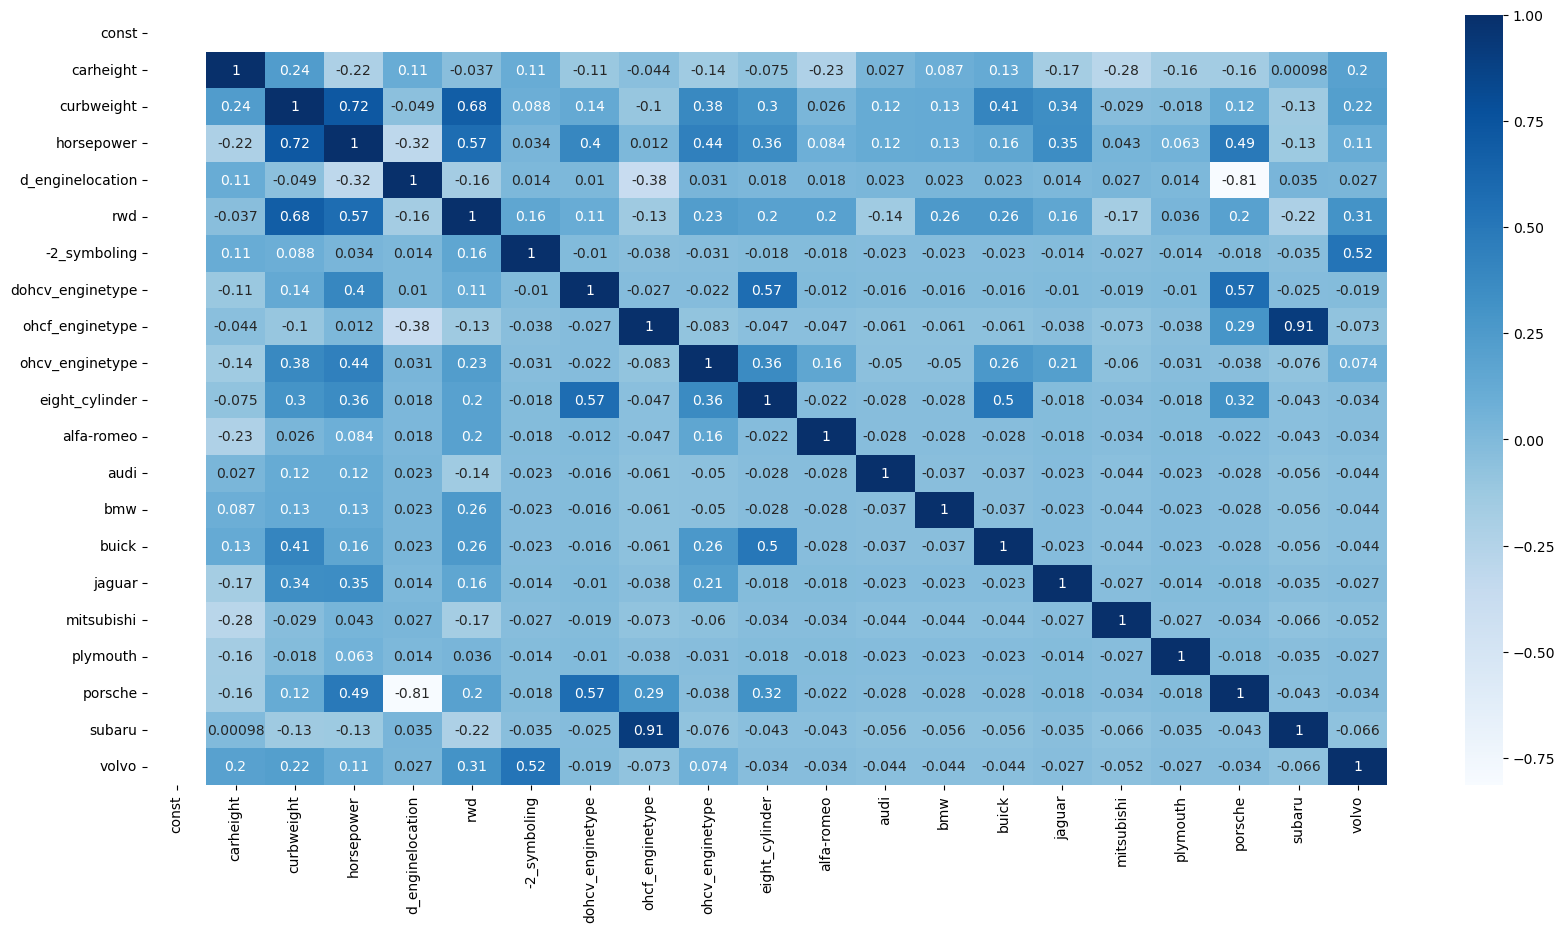

In [75]:
plt.figure(figsize = (20, 10))
sns.heatmap(X_train_1.corr(), annot = True, cmap="Blues")
plt.show()

In [76]:
X_train_without_constant_2 = X_train_without_constant_1.drop(['subaru'], axis = 1)
X_train_2 = X_train_1.drop(['subaru'], axis = 1)

### Rebuilding the model without subaru

In [77]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_2)

# Running the linear model

lm2 = sm.OLS(y_train,X_train_lm2).fit() 

#Let's see the summary of our linear model

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           1.73e-73
Time:                        14:09:14   Log-Likelihood:                 227.72
No. Observations:                 141   AIC:                            -417.4
Df Residuals:                     122   BIC:                            -361.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2417      0.031  

In [78]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3   d_enginelocation  14.43
1         curbweight   8.28
2         horsepower   6.55
4                rwd   4.04
17           porsche   3.31
9     eight_cylinder   3.03
0          carheight   2.91
6   dohcv_enginetype   2.89
8    ohcv_enginetype   2.09
13             buick   2.06
18             volvo   1.69
14            jaguar   1.57
15        mitsubishi   1.51
5       -2_symboling   1.40
11              audi   1.37
7    ohcf_enginetype   1.29
12               bmw   1.24
10        alfa-romeo   1.19
16          plymouth   1.09

In [79]:
X_train_without_constant_3 = X_train_without_constant_2.drop(['d_enginelocation'], axis = 1)
X_train_3 = X_train_2.drop(['d_enginelocation'], axis = 1)

## Rebuilding the model without d_enginelocation

In [80]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_3)

 # Running the linear model
    
lm3 = sm.OLS(y_train,X_train_lm3).fit()  

#Let's see the summary of our linear model

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           1.73e-73
Time:                        14:14:10   Log-Likelihood:                 227.72
No. Observations:                 141   AIC:                            -417.4
Df Residuals:                     122   BIC:                            -361.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0428      0.017  

In [81]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1         curbweight  43.96
2         horsepower  16.56
0          carheight  12.21
3                rwd   6.25
8     eight_cylinder   3.06
5   dohcv_enginetype   2.86
16           porsche   2.60
7    ohcv_enginetype   2.21
12             buick   2.09
17             volvo   1.73
13            jaguar   1.59
14        mitsubishi   1.49
4       -2_symboling   1.42
10              audi   1.41
6    ohcf_enginetype   1.38
11               bmw   1.26
9         alfa-romeo   1.17
15          plymouth   1.08

In [82]:
X_train_without_constant_4 = X_train_without_constant_3.drop(['rwd'], axis = 1)
X_train_4 = X_train_3.drop(["rwd"], axis = 1)

## Rebuilding the model without rwd

In [83]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm4 = sm.add_constant(X_train_4)

 # Running the linear model
    
lm4 = sm.OLS(y_train,X_train_lm4).fit()  

#Let's see the summary of our linear model

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     151.6
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           6.91e-74
Time:                        14:24:02   Log-Likelihood:                 225.85
No. Observations:                 141   AIC:                            -415.7
Df Residuals:                     123   BIC:                            -362.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0442      0.017  

In [84]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1         curbweight  27.64
2         horsepower  16.56
0          carheight   8.09
7     eight_cylinder   3.06
4   dohcv_enginetype   2.79
15           porsche   2.51
11             buick   2.09
6    ohcv_enginetype   2.09
16             volvo   1.60
12            jaguar   1.48
3       -2_symboling   1.42
5    ohcf_enginetype   1.30
13        mitsubishi   1.19
9               audi   1.16
10               bmw   1.16
8         alfa-romeo   1.13
14          plymouth   1.08

In [85]:
# dropping carheight because its having p-value > 0.05

X_train_without_constant_5 = X_train_without_constant_4.drop(['carheight'], axis = 1)
X_train_5 = X_train_4.drop(["carheight"], axis = 1)

## Rebuilding the model without carheight

In [86]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm5 = sm.add_constant(X_train_5)

 # Running the linear model
    
lm5 = sm.OLS(y_train,X_train_lm5).fit()  

#Let's see the summary of our linear model

print(lm5.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     159.8
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           1.37e-74
Time:                        14:32:47   Log-Likelihood:                 224.77
No. Observations:                 141   AIC:                            -415.5
Df Residuals:                     124   BIC:                            -365.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0602      0.012  

In [87]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1         horsepower  14.84
0         curbweight  10.59
6     eight_cylinder   3.06
3   dohcv_enginetype   2.79
14           porsche   2.51
5    ohcv_enginetype   2.06
10             buick   1.94
15             volvo   1.59
2       -2_symboling   1.41
4    ohcf_enginetype   1.28
11            jaguar   1.24
9                bmw   1.16
8               audi   1.15
12        mitsubishi   1.14
7         alfa-romeo   1.09
13          plymouth   1.07

In [88]:
# Dropping curbweight because its having VIF value greater than 5

X_train_without_constant_6 = X_train_without_constant_5.drop(['curbweight'], axis = 1)
X_train_6 = X_train_5.drop(["curbweight"], axis = 1)

## Rebuilding the model without curbweight

In [89]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm6 = sm.add_constant(X_train_6)

 # Running the linear model
    
lm6 = sm.OLS(y_train,X_train_lm6).fit()  

#Let's see the summary of our linear model

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     82.72
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           2.48e-57
Time:                        14:37:12   Log-Likelihood:                 176.67
No. Observations:                 141   AIC:                            -321.3
Df Residuals:                     125   BIC:                            -274.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0246      0.013  

In [90]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0         horsepower  3.06
5     eight_cylinder  3.06
2   dohcv_enginetype  2.74
13           porsche  1.98
4    ohcv_enginetype  1.88
9              buick  1.80
14             volvo  1.56
1       -2_symboling  1.41
3    ohcf_enginetype  1.27
10            jaguar  1.23
8                bmw  1.16
7               audi  1.15
11        mitsubishi  1.13
6         alfa-romeo  1.09
12          plymouth  1.05

In [92]:
# Dropping alfa-romeo because its having p-value greater than 5

X_train_without_constant_7 = X_train_without_constant_6.drop(['alfa-romeo'], axis = 1)
X_train_7 = X_train_6.drop(["alfa-romeo"], axis = 1)

## Rebuilding the model without alfa-romeo

In [93]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm7 = sm.add_constant(X_train_7)

 # Running the linear model
    
lm7 = sm.OLS(y_train,X_train_lm7).fit()  

#Let's see the summary of our linear model

print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     87.53
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           8.15e-58
Time:                        14:44:27   Log-Likelihood:                 175.36
No. Observations:                 141   AIC:                            -320.7
Df Residuals:                     126   BIC:                            -276.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0246      0.013  

In [94]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5     eight_cylinder  3.04
0         horsepower  2.98
2   dohcv_enginetype  2.74
12           porsche  1.98
4    ohcv_enginetype  1.84
8              buick  1.80
13             volvo  1.55
1       -2_symboling  1.41
3    ohcf_enginetype  1.27
9             jaguar  1.22
7                bmw  1.15
6               audi  1.14
10        mitsubishi  1.13
11          plymouth  1.05

In [104]:
# the p-value of ohcv_enginetype is < 0.05, let us remove that and see if there is any impact

X_train_without_constant_8 = X_train_without_constant_7.drop(['ohcv_enginetype'], axis = 1)
X_train_8 = X_train_7.drop(["ohcv_enginetype"], axis = 1)

## Rebuilding the model without ohcv_enginetype

In [108]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm8 = sm.add_constant(X_train_8)

 # Running the linear model
    
lm8 = sm.OLS(y_train,X_train_lm8).fit()  

#Let's see the summary of our linear model

print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     91.28
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           8.03e-58
Time:                        15:05:46   Log-Likelihood:                 172.80
No. Observations:                 141   AIC:                            -317.6
Df Residuals:                     127   BIC:                            -276.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0338      0.013  

In [109]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4     eight_cylinder  2.51
2   dohcv_enginetype  2.45
0         horsepower  2.30
11           porsche  1.93
7              buick  1.77
12             volvo  1.55
1       -2_symboling  1.40
3    ohcf_enginetype  1.25
8             jaguar  1.21
6                bmw  1.12
5               audi  1.11
9         mitsubishi  1.10
10          plymouth  1.04

In [110]:
# the p-value of ohcf_enginetype is < 0.05, let us remove that and see if there is any impact

X_train_without_constant_9 = X_train_without_constant_8.drop(['ohcf_enginetype'], axis = 1)
X_train_9 = X_train_8.drop(["ohcf_enginetype"], axis = 1)

## Rebuilding the model without ohcv_enginetype

In [111]:

# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm9 = sm.add_constant(X_train_9)

 # Running the linear model
    
lm9 = sm.OLS(y_train,X_train_lm9).fit()  

#Let's see the summary of our linear model

print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     96.34
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           5.48e-58
Time:                        15:10:35   Log-Likelihood:                 170.65
No. Observations:                 141   AIC:                            -315.3
Df Residuals:                     128   BIC:                            -277.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0277      0.012  

In [112]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3     eight_cylinder  2.51
2   dohcv_enginetype  2.34
0         horsepower  2.18
6              buick  1.76
10           porsche  1.76
11             volvo  1.54
1       -2_symboling  1.40
7             jaguar  1.20
4               audi  1.11
5                bmw  1.11
8         mitsubishi  1.09
9           plymouth  1.04

In [113]:
# the p-value of -2_symboling is < 0.05, let us see if removing it has any impact

X_train_without_constant_10 = X_train_without_constant_9.drop(['-2_symboling'], axis = 1)
X_train_10 = X_train_9.drop(["-2_symboling"], axis = 1)

## Rebuilding the model without -2_symboling

In [114]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm10 = sm.add_constant(X_train_10)

 # Running the linear model
    
lm10 = sm.OLS(y_train,X_train_lm10).fit()  

#Let's see the summary of our linear model

print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     100.9
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           8.39e-58
Time:                        15:13:24   Log-Likelihood:                 167.58
No. Observations:                 141   AIC:                            -311.2
Df Residuals:                     129   BIC:                            -275.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0267      0.013  

In [115]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2     eight_cylinder  2.51
1   dohcv_enginetype  2.34
0         horsepower  2.18
5              buick  1.76
9            porsche  1.76
6             jaguar  1.20
10             volvo  1.13
3               audi  1.11
4                bmw  1.11
7         mitsubishi  1.09
8           plymouth  1.04

In [121]:
#  the p-value of mitsubishi is < 0.05, let us see if removing it has any impact

X_train_without_constant_11 = X_train_without_constant_10.drop(['mitsubishi'], axis = 1)
X_train_11 = X_train_10.drop(["mitsubishi"], axis = 1)

## Rebuilding the model without mitsubishi

In [122]:
import statsmodels.api as sm  
X_train_lm11 = sm.add_constant(X_train_11)

 # Running the linear model
lm11 = sm.OLS(y_train,X_train_lm11).fit()  

#Let's see the summary of our linear model
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     105.6
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           2.09e-57
Time:                        15:31:50   Log-Likelihood:                 163.98
No. Observations:                 141   AIC:                            -306.0
Df Residuals:                     130   BIC:                            -273.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0260      0.013  

In [123]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2    eight_cylinder  2.51
1  dohcv_enginetype  2.34
0        horsepower  2.00
5             buick  1.75
8           porsche  1.74
6            jaguar  1.18
9             volvo  1.12
3              audi  1.10
4               bmw  1.10
7          plymouth  1.04

In [126]:
# the p-value of plymouth is > 0.05

X_train_without_constant_12 = X_train_without_constant_11.drop(['plymouth'], axis = 1)
X_train_12 = X_train_11.drop(["plymouth"], axis = 1)

## Rebuilding the model without plymouth

In [127]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm12 = sm.add_constant(X_train_12)

 # Running the linear model
    
lm12 = sm.OLS(y_train,X_train_lm12).fit()  

#Let's see the summary of our linear model

print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     115.6
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           7.14e-58
Time:                        15:33:11   Log-Likelihood:                 162.52
No. Observations:                 141   AIC:                            -305.0
Df Residuals:                     131   BIC:                            -275.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0267      0.013  

In [128]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_12
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2    eight_cylinder  2.51
1  dohcv_enginetype  2.34
0        horsepower  1.93
5             buick  1.75
7           porsche  1.73
6            jaguar  1.18
8             volvo  1.12
4               bmw  1.10
3              audi  1.09

In [129]:
# the p-value of eight_cylinder is > 0.05

X_train_without_constant_13 = X_train_without_constant_12.drop(['eight_cylinder'], axis = 1)
X_train_13 = X_train_12.drop(["eight_cylinder"], axis = 1)

## Rebuilding the model without eight_cylinder

In [130]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm13 = sm.add_constant(X_train_13)

 # Running the linear model
    
lm13 = sm.OLS(y_train,X_train_lm13).fit()  

#Let's see the summary of our linear model

print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     127.3
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           3.13e-58
Time:                        15:46:38   Log-Likelihood:                 160.75
No. Observations:                 141   AIC:                            -303.5
Df Residuals:                     132   BIC:                            -277.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0246      0.013  

In [131]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_13
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0        horsepower  1.92
6           porsche  1.73
1  dohcv_enginetype  1.52
5            jaguar  1.18
4             buick  1.12
7             volvo  1.12
3               bmw  1.10
2              audi  1.09

Observations :

- The p-values of all independent variables is 0.000 , which is less than 0.05 and hence they seem to be good
- The VIF values of all the variables are < 3, which is also good.
- The R-Squared and adjusted R-Squared values are 88.5% and 87.5%, which look good.

The VIF's and p-values are both within the acceptable range. Hence we can finalize on this model 

In [132]:
# Print the final columns

X_train_13.columns

Index(['const', 'horsepower', 'dohcv_enginetype', 'audi', 'bmw', 'buick',
       'jaguar', 'porsche', 'volvo'],
      dtype='object')

In [133]:
# Remove the const variable from the final column

X_train_13 = X_train_13.drop(['const'], axis=1)

In [134]:
# Calculate the VIFs for the new model after removing the const column

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_13
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0        horsepower  1.92
6           porsche  1.73
1  dohcv_enginetype  1.52
5            jaguar  1.18
4             buick  1.12
7             volvo  1.12
3               bmw  1.10
2              audi  1.09

# Residual Analysis of the train data

In [135]:
y_train_price = lm13.predict(X_train_lm13)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

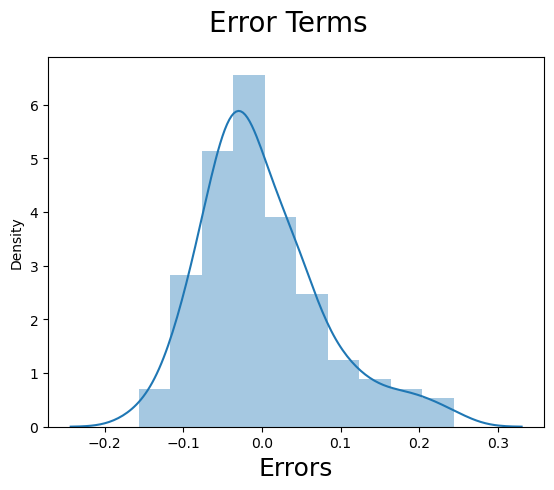

In [136]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 10)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

# Making predictions using the final model 13th

### Applying the scaling on the test sets

In [137]:
num_vars =['carheight', 'curbweight', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [138]:
df_test.describe()

carheight  curbweight  boreratio     stroke  compressionratio  \
count  61.000000   61.000000  61.000000  61.000000         61.000000   
mean    0.462295    0.398320   0.559251   0.591803          0.170697   
std     0.194678    0.192157   0.190315   0.147778          0.213526   
min     0.133333    0.087277   0.264286   0.057143          0.000000   
25%     0.266667    0.264158   0.435714   0.514286          0.100000   
50%     0.433333    0.354926   0.521429   0.580952          0.125000   
75%     0.616667    0.557797   0.742857   0.661905          0.150000   
max     1.000000    1.000000   1.000000   1.000000          1.000000   

       horsepower    peakrpm    citympg      price  d_fueltype  ...  \
count   61.000000  61.000000  61.000000  61.000000   61.000000  ...   
mean     0.230328   0.417531   0.377049   0.232683    0.934426  ...   
std      0.153193   0.181184   0.200598   0.221210    0.249590  ...   
min      0.016667   0.020408   0.058824   0.008532    0.000000  ...   
25%      0.091667   0.265306   0.205882   0.082489    1.000000  ...   
50%      0.204167   0.428571   0.323529   0.142340    1.000000  ...   
75%      0.283333   0.551020   0.529412   0.364492    1.000000  ...   
max      0.662500   1.000000   1.058824   1.004660    1.000000  ...   

          nissan    peugeot   plymouth    porsche    renault       saab  \
count  61.000000  61.000000  61.000000  61.000000  61.000000  61.000000   
mean    0.081967   0.032787   0.081967   0.032787   0.032787   0.016393   
std     0.276591   0.179556   0.276591   0.179556   0.179556   0.128037   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

          subaru     toyota  volkswagen      volvo  
count  61.000000  61.000000   61.000000  61.000000  
mean    0.016393   0.229508    0.032787   0.065574  
std     0.128037   0.424006    0.179556   0.249590  
min     0.000000   0.000000    0.000000   0.000000  
25%     0.000000   0.000000    0.000000   0.000000  
50%     0.000000   0.000000    0.000000   0.000000  
75%     0.000000   0.000000    0.000000   0.000000  
max     1.000000   1.000000    1.000000   1.000000  

[8 rows x 70 columns]

### Dividing into X_test and y_test

In [139]:
y_test = df_test.pop('price')
X_test = df_test

In [140]:
# Now let's use our model to make predictions.

# Creating X_test_lm13 dataframe by taking only the variables that exist in the final train model - X_train_13

X_test_lm13 = X_test[X_train_13.columns]

# Adding a constant variable 

X_test_lm13 = sm.add_constant(X_test_lm13)

In [142]:
# Making predictions unsing the 13th model

y_pred_lm13 = lm13.predict(X_test_lm13)

# Model Evaluation

Text(0, 0.5, 'y_pred')

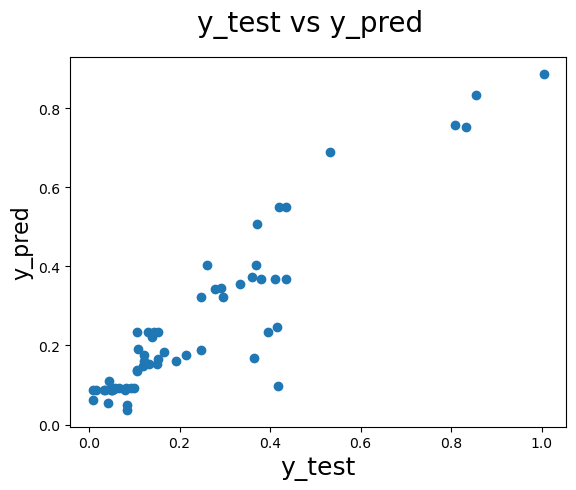

In [144]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_lm13)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

# R squared score

In [145]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lm13)

0.8504120829125644

# Conclusion :

The model for the most part is capturing the linear association well and overall looks good

The R square and Adjusted R square values in the above Car Price Model for trained data set are almost very close to each other i.e., 88.5% and 87.5% respectively. This indicates that none of the parameters in the Car Price Model are reduntant.

Variance Inflation Factor of all variables is < 3.

The R-Squared Score on the test dataset is 85 %, which is a good value.

The following variables are significant for predicting the car prices in US Market : 1. DOHCV Engine Type 2.Horsepower 
3.Car Make : Buick, Porsche, Jaguar, Volvo, Audi, BMW